In [59]:
# Step 1: Import Library
# ทำการ Import Library ที่จำเป็นในการใช้สำหรับครั้งนี้ เช่น numpy , pandas , sklearn และ graphviz

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

In [60]:
# Step 2: Load dataset
# ทำการ load uci_iris dataset ผ่านทาง sklearn ได้เลย โดยไม่ต้องผ่าน .csv file

# load dataset
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:

# Step 3: Prepare variables
# ทำการกำหนด Feature matrix และ Target (ซึ่งเป็น Vector data) และกำหนด Class name ของ Feature ต่างๆ


X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names

In [62]:
# Step 4: Create Model
# ก่อนจะทำการสร้าง Model ให้เราทำการแบ่งข้อมูลออกเป็น Train data และ Test data โดยในบทความนี้เราจะแบ่งข้อมูลออกเป็น 70:30
# จากนั้นทำการสร้าง Model โดนใช้ Criterion ในรูปแบบของ Entropy (ตัวนี้คือ Information Gain ซึ่งเราสามารถใช้ Gain Ration หรือ Gini Index ก็ได้)


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_score = clf.score(X,y)

In [63]:
# Step 5: Model performance
# เมื่อทำการสร้าง Model เสร็จก็ลองดู Preformance ของ Model ที่เราสร้างว่าเป็นยังไงกัน ดีหรือไม่ดีนะ

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



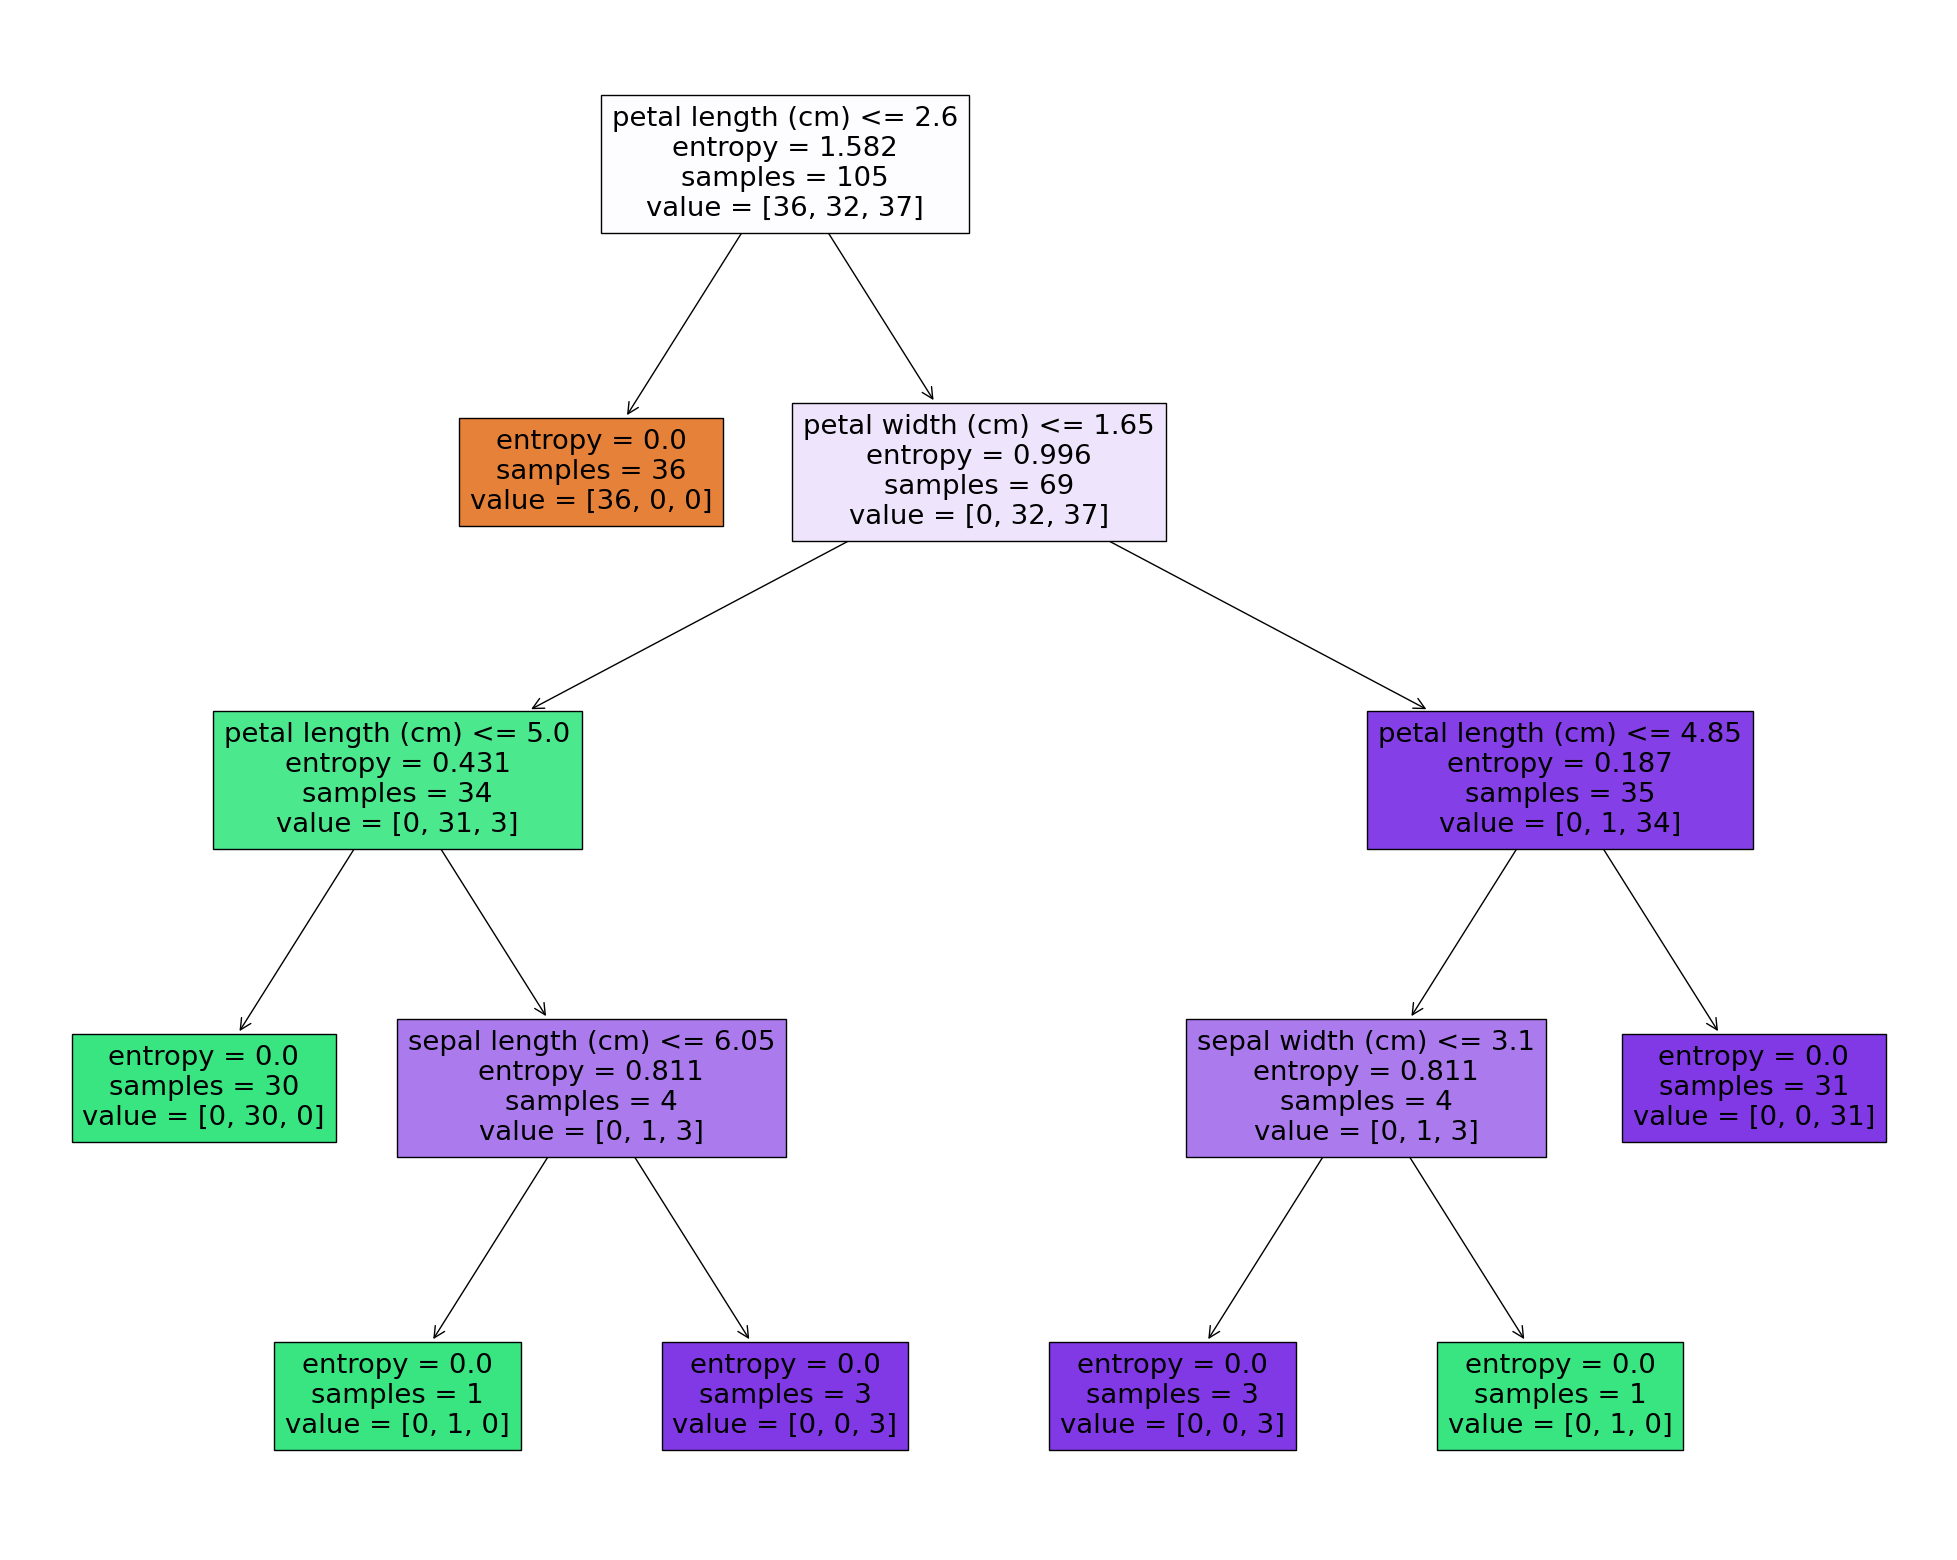

In [66]:
# Step 6: Visualization
# ทำการ Visualize Decision Tree ของเราออกมาดูว่า เอ๊ะ มันมีหน้าตายังไงกันนะ

fig = plt.figure(figsize=(25,20))
visualize_data_iris = tree.plot_tree(clf, feature_names=data.feature_names, filled=True)
fig.savefig('tree.png')
